In [ ]:
#Mengimpor pustaka yang diperlukan untuk analisis data, visualisasi, dan pembuatan model.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [ ]:
#Membaca dataset dari file CSV dan menyimpannya dalam dataframe df.
df = pd.read_csv('Transformed Data Set - Sheet1.csv')
df

,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender
0,Cool,Rock,Vodka,7UP/Sprite,F
1,Neutral,Hip hop,Vodka,Coca Cola/Pepsi,F
2,Warm,Rock,Wine,Coca Cola/Pepsi,F
3,Warm,Folk/Traditional,Whiskey,Fanta,F
4,Cool,Rock,Vodka,Coca Cola/Pepsi,F
...,...,...,...,...,...
61,Cool,Rock,Vodka,Coca Cola/Pepsi,M
62,Cool,Hip hop,Beer,Coca Cola/Pepsi,M
63,Neutral,Hip hop,Doesn't drink,Fanta,M
64,Cool,Rock,Wine,Coca Cola/Pepsi,M


In [ ]:
#Menampilkan informasi deskriptif tentang dataset seperti rata-rata, standar deviasi, dan lain-lain menggunakan describe().
df.describe()

,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender
count,66,66,66,66,66
unique,3,7,6,4,2
top,Cool,Rock,Doesn't drink,Coca Cola/Pepsi,F
freq,37,19,14,32,33


In [ ]:
#Menampilkan informasi tentang dataset seperti tipe data dan jumlah nilai non-null menggunakan info().
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Favorite Color        66 non-null     object
 1   Favorite Music Genre  66 non-null     object
 2   Favorite Beverage     66 non-null     object
 3   Favorite Soft Drink   66 non-null     object
 4   Gender                66 non-null     object
dtypes: object(5)
memory usage: 2.7+ KB


In [ ]:
#Menghitung jumlah nilai yang hilang di setiap kolom menggunakan isnull().sum().
df.isnull().sum()

Favorite Color          0
Favorite Music Genre    0
Favorite Beverage       0
Favorite Soft Drink     0
Gender                  0
dtype: int64

In [ ]:
#Memisahkan fitur (X) dan target (Y) dari dataset.
X=df.drop(['Gender'],axis=1)
Y=df['Gender']
X.shape, Y.shape

((66, 4), (66,))

In [ ]:
# Membagi dataset menjadi data latih dan data uji
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [ ]:
# Menggunakan LabelEncoder untuk mengubah kolom string menjadi numerik
label_encoders = {}
for column in X_train.columns:
    le = LabelEncoder()
    X_train[column] = le.fit_transform(X_train[column])
    X_test[column] = le.transform(X_test[column])
    label_encoders[column] = le

In [ ]:
# Membuat dan melatih model Regresi Logistik
model = LogisticRegression()
model.fit(X_train, Y_train)

LogisticRegression()

In [ ]:
print(model.coef_)

[[-0.26000166 -0.17362339 -0.11955988  0.19735981]]


In [ ]:
#Melakukan prediksi pada data uji.
Y_pred = pd.Series(model.predict(X_test))
Y_test = Y_test.reset_index(drop=True)
z = pd.concat([Y_test, Y_pred], axis=1)
z.columns = ['True', 'Prediction']
z.head()

,True,Prediction
0,M,M
1,F,M
2,F,M
3,M,M
4,M,M


In [ ]:
#Menggunakan metrik seperti akurasi, presisi, dan recall untuk mengevaluasi kinerja model.
print("Accuracy", metrics.accuracy_score(Y_test, Y_pred))
print("Precision", metrics.precision_score(Y_test, Y_pred, pos_label="M"))
print("Recall", metrics.recall_score(Y_test, Y_pred, pos_label="M"))

Accuracy 0.5714285714285714
Precision 0.75
Recall 0.6


In [ ]:
#Menggunakan metrik seperti akurasi, presisi, dan recall untuk mengevaluasi kinerja model.
print("Accuracy", metrics.accuracy_score(Y_test, Y_pred))
print("Precision", metrics.precision_score(Y_test, Y_pred, pos_label="F"))
print("Recall", metrics.recall_score(Y_test, Y_pred, pos_label="F"))

Accuracy 0.5714285714285714
Precision 0.3333333333333333
Recall 0.5


Text(0.5, 23.52222222222222, 'True')

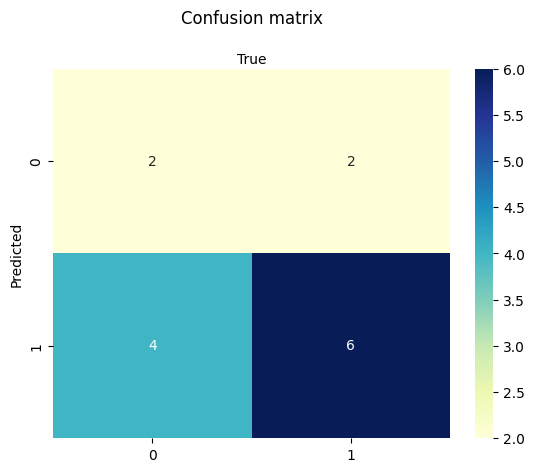

In [ ]:
#Menghitung matriks kebingungan (confusion matrix).
cnf_matrix = metrics.confusion_matrix(Y_test, Y_pred)

labels = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels)
plt.yticks(tick_marks, labels)

#Create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Predicted')
plt.xlabel('True')

In [ ]:
#Menyimpan model Regresi Logistik yang telah dilatih ke dalam file 'Dimas.joblib' menggunakan joblib.dump().
import joblib

#Model yang ingin anda simpan
joblib.dump(model, 'Dimas.joblib')

['Dimas.joblib']